In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("always")
import matplotlib.animation as animation

In [28]:
df = pd.read_csv('housing_price.csv')

In [29]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [30]:
y = df.iloc[:,0]

In [31]:
X= df.iloc[:,1:5]

In [32]:
X = pd.concat([X,df['garagepl']],axis = 1)

In [33]:
X.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,5850,3,1,2,1
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0


In [34]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [35]:
X = np.c_[np.ones(X.shape[0]),X]

In [36]:
lemda = 10
a = np.identity(X.shape[1])
a[0][0] = 0
theta = np.matmul(np.linalg.inv(np.matmul(X.T,X) + lemda * a),np.matmul(X.T,y))
print(theta)

[40258.60166749 38571.11193726 12725.66543547 32027.71391458
 22746.16796064 19101.72772245]


In [37]:
print(theta)

[40258.60166749 38571.11193726 12725.66543547 32027.71391458
 22746.16796064 19101.72772245]


# predicting values using normal equation

In [38]:
predicted_val = np.matmul(X,theta.T)

In [39]:
df['prediction'] = predicted_val

In [40]:
df['Squared_error'] = (df['price'] - df['prediction']) ** 2

In [41]:
mean_error = np.sum(df['Squared_error']) * (1 / (df.shape[0]))

In [42]:
print(np.sqrt(mean_error))

18503.829230050946


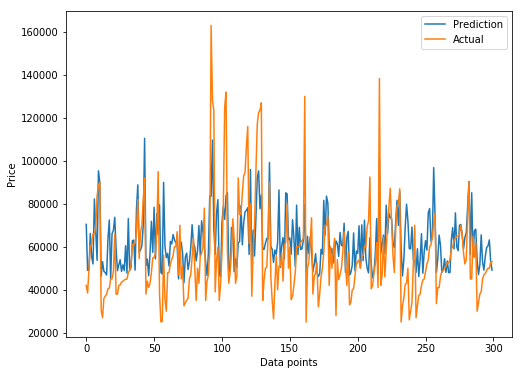

In [43]:
figure = plt.figure(figsize=(8,6))
plt.plot(predicted_val[0:300],label = 'Prediction')
plt.plot(y[0:300],label='Actual')
plt.xlabel('Data points')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,prediction,Squared_error
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no,70432.095622,8.083841e+08
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no,49033.433246,1.109532e+08
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no,49086.686937,1.708277e+05
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no,66185.601470,3.232606e+07
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no,55289.641093,3.260820e+07


In [45]:
def gradient_descent(x,y,theta,num_iterations,alpha,lemda):
    past_costs = []
    past_thetas = []
    lembda_mat = lemda * np.identity(X.shape[1])
    lembda_mat[0][0] = 0
    for i in range(num_iterations):
        prediction = np.dot(x,theta)
        error = prediction - y
        cost = 1 / (2 * m) * ( np.dot(error.T, error) + lemda * np.dot(theta.T, theta))
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * ( np.dot(x.T, error) + np.matmul(lembda_mat,theta)))
        past_thetas.append(theta)
    return past_thetas, past_costs

In [53]:
alpha = 0.1
lemda = 10
iterations = 2000

m = y.size
np.random.seed(123)
theta1 = np.random.rand(X.shape[1])

In [54]:
weight,cost = gradient_descent(X,y,theta1,iterations,alpha,lemda)

In [55]:
print(weight[-1])
print(theta)

[40253.58524794 38557.53438988 12748.46480711 32017.60948826
 22744.00829608 19104.88955175]
[40258.60166749 38571.11193726 12725.66543547 32027.71391458
 22746.16796064 19101.72772245]


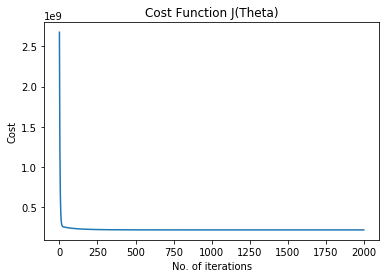

In [56]:
plt.title('Cost Function J(Theta)')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost)
plt.show()

In [57]:
df.drop(labels=['prediction','Squared_error'],axis = 1,inplace=True)

In [58]:
predicted_val = np.matmul(X,weight[-1].T)
df['prediction'] = predicted_val
df['Squared_error'] = (df['price'] - df['prediction']) ** 2
mean_error = np.sum(df['Squared_error']) * (1 / (df.shape[0]))
print(np.sqrt(mean_error))

18504.369905958927


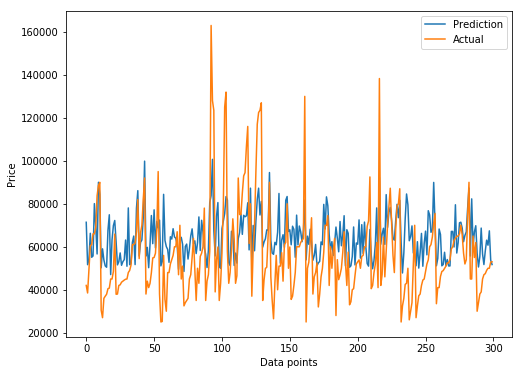

In [26]:
figure = plt.figure(figsize=(8,6))
plt.plot(predicted_val[0:300],label = 'Prediction')
plt.plot(y[0:300],label='Actual')
plt.xlabel('Data points')
plt.ylabel('Price')
plt.legend()
plt.show()